## Practice 2

In this notebook the challenge is to use Pandas, and appropriate ancillary modules, to load in data on traffic volume from a number of sites across Manchester city centre.  This data is provided through an agreement with the transport authority for greater manchester, TfGM. Included as part of TfGM’s ITS estate, are a network of approximately 550 Bluetooth Journey Time Passive Sensors, primarily located at Traffic Signal junctions along major routes across the wider Greater Manchester (GM) region. Sensors use an external antenna to capture Bluetooth enabled devices, storing their unique Media Access Control (MAC) address, which is then randomised and encrypted. MAC addresses are collected across the network with an associated timestamp, allowing journey times to be generated across the Highway Network, utilising the C2 platform to filter outliers. A validation exercise completed internally at TfGM estimates that this method captures between 8 \% – 15 \% of vehicles making a journey between two sensors, depending on the route.  

You have the following general challenges 

 - 1) Produce correlation coefficient heatmaps of traffic volume between all sites.
 - 2) Plot time series of volume for Portland street and the Mancunian way in December 2019. Can you see the Christmas day dip?
 - 3) Compare the diurnal profiles of sites.
 
The relevant class notebooks which may help here are Practical sessions 5,6,7 and 8. 

In [1]:
# The following code loads all of the traffic volume into one data frame [combined_df], where each column is a unique ID
# A second dataframe [site_info] maps those IDs on to coordinates.

import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

site_dict=dict()
site_df_list=[]
site_ID=[]

for filepath in glob.iglob('data/TfGM/TfGM/pvr_*'):
    print(filepath)
    try:
        #pdb.set_trace()
        new_dataframe=pd.read_csv(filepath,usecols=["Sdate","Volume","Cosit"])
        ID = new_dataframe.Cosit[0]
        #set the index to datetime
        new_dataframe.drop(columns=['Cosit'])
        new_dataframe['datetime'] = pd.to_datetime(new_dataframe['Sdate'])
        #pdb.set_trace()
        mask = (new_dataframe['datetime'] > '2018-01-01') & (new_dataframe['datetime'] <= '2020-01-01')
        new_dataframe=new_dataframe.loc[mask]
        if (new_dataframe.datetime.min() <= pd.to_datetime('2018-01-02')) and (new_dataframe['datetime'].max() >= pd.to_datetime('2019-12-30')):
            new_dataframe = new_dataframe.sort_values(by='datetime',ascending=True)
            new_dataframe=new_dataframe.set_index('datetime')
            # now collapse any 0 or multiple entries into a total per hour
            new_dataframe=new_dataframe.resample('60Min').sum()
            # rename the volume column to represent the site ID
            new_dataframe=new_dataframe.rename(columns={"Volume": ID})
            #pdb.set_trace()
            site_ID.append(ID)
            site_dict[ID]=new_dataframe
            site_df_list.append(new_dataframe)
        else:
            print("Dates not in range for ", ID)
    except:
        print("Could not create entry for ", ID)

# Now concatenate all of our dataframes into one new dataframe
#pdb.set_trace()
combined_df=pd.concat(site_df_list, axis=1)
combined_df=combined_df.dropna()
combined_df.head()

# Now create a seperate dataframe that holds inforamtion about the site locations etc
site_info=pd.read_csv('data/TfGM/TfGM/GM_JOURNEY_TIME_sites(1).csv')
site_info.head()

data/TfGM/TfGM\pvr_1970-01-01_18629d.csv
Dates not in range for  ="MAC030004358"
data/TfGM/TfGM\pvr_2016-01-01_1522d.csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(1).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(10).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(11).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(12).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(13).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(14).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(15).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(16).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(17).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(18).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(19).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(2).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(20).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(21).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(22).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(23).csv
Dates not in range for  ="MAC000001078"
data/TfGM/TfGM\pvr_2016-01-01_1828d(24).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(25).csv
data/TfGM/TfGM\pvr_2016-01-01_1828d(26).csv
data/

,Site ID,Site Name,Description,Speed Limit (mph),Grid,Orientation,Longitude,Latitude,Bearing,Parameters
0,"=""000000001304""","=""1304""","Manchester Rd (A572) / Lingards Ln, Astley, Wi...",30.0,"=""369151399819""",E,53.49416,-2.46646,90,noexport=1
1,"=""000000001305""","=""1305""","Leigh Rd (A572) / 100m E of Falconwood Chase, ...",40.0,"=""373097400749""",W,53.50274,-2.40707,270,noexport=1
2,"=""000000001306""","=""1306""","Blackburn Rd (A666) / 100m N of Cox Green Rd, ...",40.0,"=""370527415759""",S,53.63751,-2.44724,165,noexport=1
3,"=""000000001307""","=""1307""","Middleton Rd (A576) / 100m S of Scholes Ln, Hi...",30.0,"=""383726403510""",S,53.52799,-2.24697,195,noexport=1
4,"=""000000001308""","=""1308""",Rochdale Rd (A664) / 400m NE of Stanycliffe Ln...,30.0,"=""388024407705""",SW,53.56582,-2.18230,210,noexport=1


## 1) Produce correlation coefficient heatmaps of traffic volume between all sites

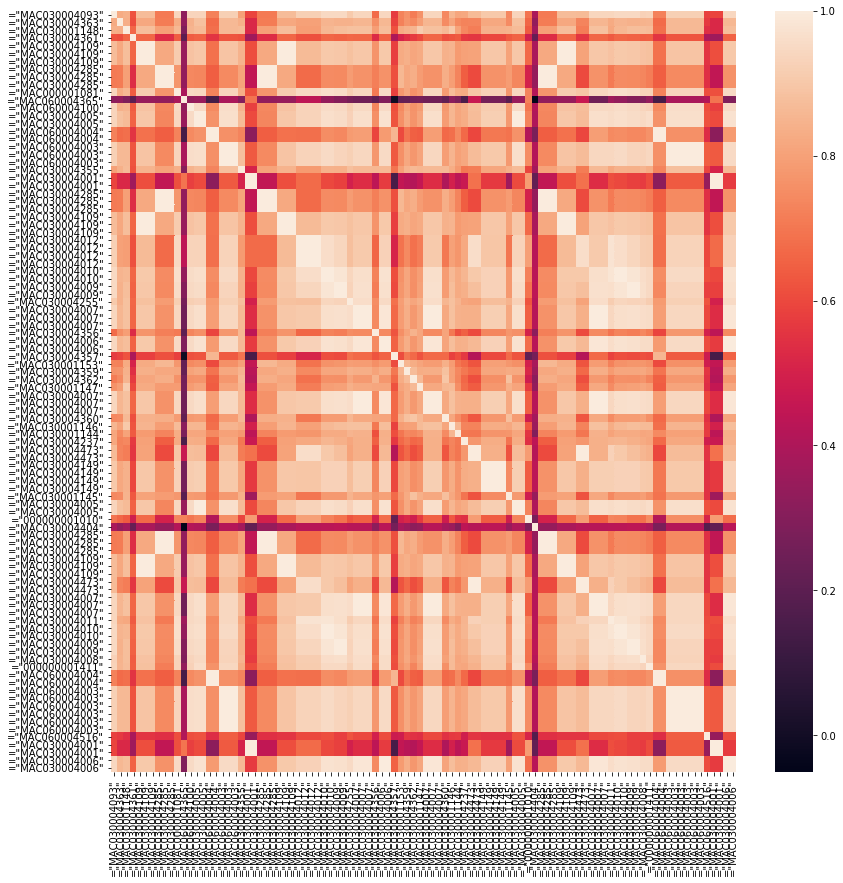

In [2]:
# In the following we use Seaborn to generate a correlation coefficient heatmap of all our sites.
# What does the heatmap tell is? It will be difficult to read given the number of sites we have
# However, you will see there are parts in the network that have clear relationships. 
corr = combined_df[combined_df.columns].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
# And we now need to show the plot.
plt.show()

## 2) Plot time series of volume for Portland street and the Mancunian way in December 2019.

So, Im cheating here in that I know two site IDs that are on both Portland street and the Mancunian way. These are:
 - ="MAC030001148"
 - ="MAC060004003"

However, you can interrogate the site_info data and filter sites according to coordinates. Can you see the Christmas day dip?

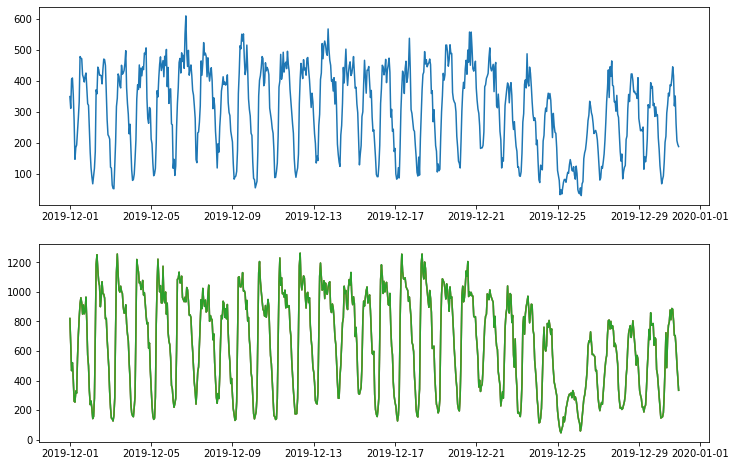

In [3]:
# Create a canvas for our plot
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharey=False)
axs[0].plot(combined_df[((combined_df.index >= '2019-12-01') & (combined_df.index < '2019-12-31'))].index,combined_df[((combined_df.index >= '2019-12-01') & (combined_df.index < '2019-12-31'))]['="MAC030001148"'])
axs[1].plot(combined_df[((combined_df.index >= '2019-12-01') & (combined_df.index < '2019-12-31'))].index,combined_df[((combined_df.index >= '2019-12-01') & (combined_df.index < '2019-12-31'))]['="MAC060004003"'])
plt.show()
#4404
#1145

## 3) Compare the diurnal profiles of two sites.

It dosnt matter which sites you compare here. Why not expand this to 3 sites?

[Text(0, 0.5, 'Volume'), Text(0.5, 0, 'Hour of day')]

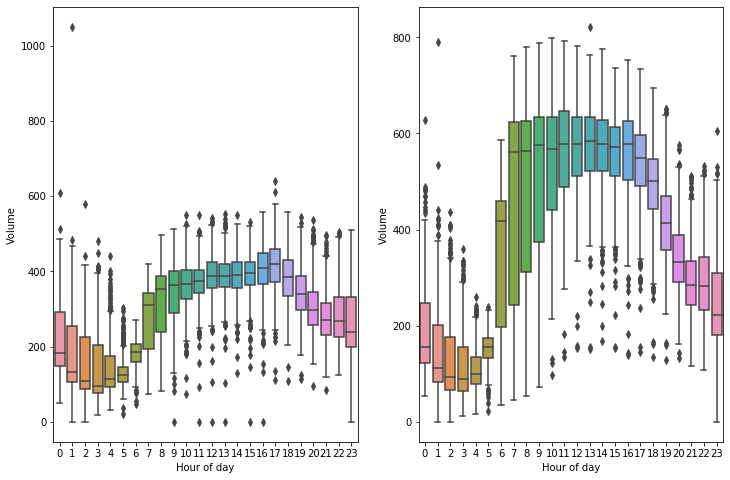

In [4]:
fig, axes = plt.subplots(1,2,figsize=(12,8))
sns.boxplot(data=combined_df,x=combined_df.index.hour, y=combined_df['="MAC030001148"'], ax=axes[0]).set(xlabel='Hour of day',ylabel='Volume')
sns.boxplot(data=combined_df,x=combined_df.index.hour, y=combined_df['="MAC060004100"'], ax=axes[1]).set(xlabel='Hour of day',ylabel='Volume')
